In [70]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os


month_dict = {
    "Ocak":1,
    "Şubat":2,
    "Mart":3,
    "Nisan":4,
    "Mayıs":5,
    "Haziran":6,
    "Temmuz":7,
    "Ağustos":8,
    "Eylül":9,
    "Ekim":10,
    "Kasım":11,
    "Aralık":12
}


# URL of the Turkish Wikipedia page revision history
article = "Recep Tayyip Erdoğan"

def get_revision_frequency(article):
    url = f'https://tr.wikipedia.org/w/index.php?title={article.replace(" ", "_")}&action=history&limit=3000'

    print(url)
    # Send a GET request
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract all timestamps
    timestamps = [item.text for item in soup.find_all('a', class_='mw-changeslist-date')]
    
    # Process timestamps to extract month and year (assuming format is similar to English)
    months = [timestamp.split(' ')[2] + " " + timestamp.split(' ')[3] for timestamp in timestamps]
    
    # Count edits per month
    edit_counts = Counter(months)

    # Convert to DataFrame for better visualization or further analysis
    df = pd.DataFrame(list(edit_counts.items()), columns=['Month', 'Number of Edits'])
    reversed_df = df.iloc[::-1].reset_index(drop=True)
    return reversed_df


In [50]:
df = get_revision_frequency(article)
print(df)

https://tr.wikipedia.org/w/index.php?title=Recep_Tayyip_Erdoğan&action=history&limit=3000
            Month  Number of Edits
0     Temmuz 2013                1
1    Ağustos 2013               41
2      Eylül 2013               43
3       Ekim 2013               27
4      Kasım 2013               19
..            ...              ...
119   Aralık 2023               18
120     Ocak 2024               12
121    Şubat 2024                2
122     Mart 2024                7
123    Nisan 2024               14

[124 rows x 2 columns]


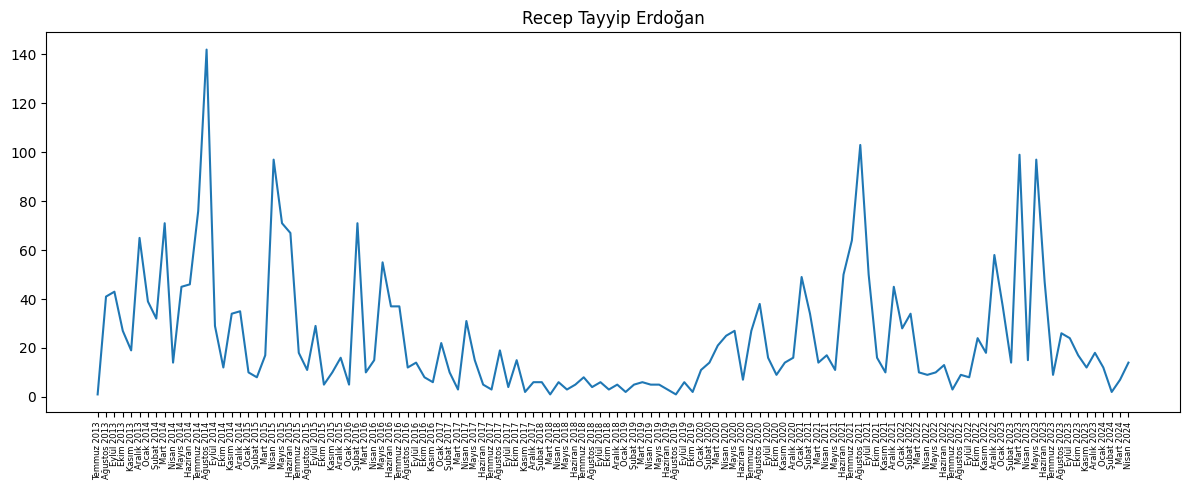

In [51]:
fig = plt.figure(figsize = (12, 5))
plt.plot(df["Month"], df["Number of Edits"])
plt.title("Recep Tayyip Erdoğan")
plt.xticks(fontsize=6, rotation='vertical')
plt.tight_layout()
plt.show()

In [56]:
ekrem = get_revision_frequency("Ekrem İmamoğlu")
print(ekrem)

https://tr.wikipedia.org/w/index.php?title=Ekrem_İmamoğlu&action=history&limit=3000
           Month  Number of Edits
0      Ocak 2019                7
1      Mart 2019                6
2     Nisan 2019              108
3     Mayıs 2019               54
4   Haziran 2019               74
..           ...              ...
57   Aralık 2023                6
58     Ocak 2024               15
59    Şubat 2024                3
60     Mart 2024               36
61    Nisan 2024               44

[62 rows x 2 columns]


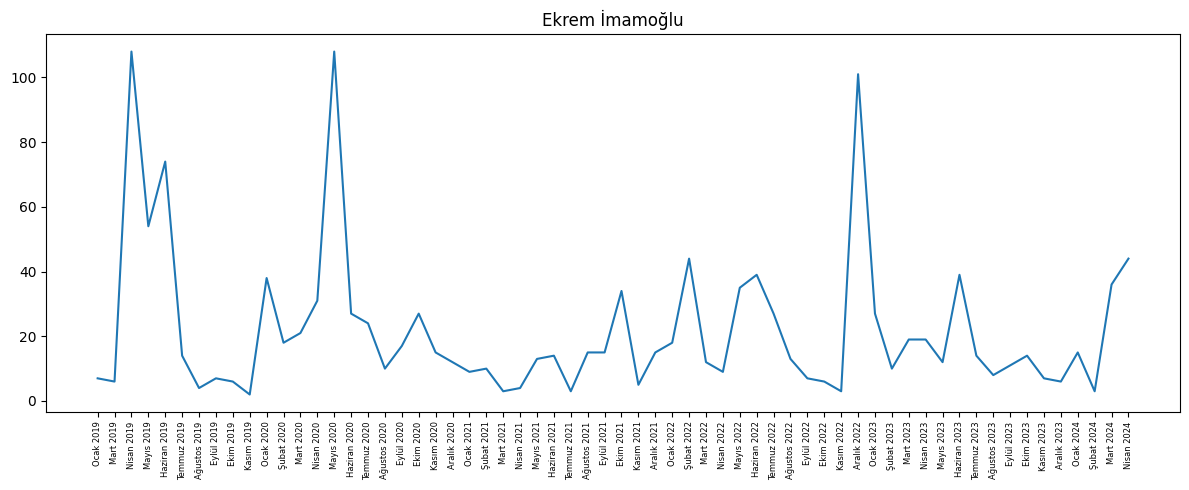

In [58]:
fig = plt.figure(figsize = (12, 5))
plt.plot(ekrem["Month"], ekrem["Number of Edits"])
plt.title("Ekrem İmamoğlu")
plt.xticks(fontsize=6, rotation='vertical')
plt.tight_layout()
plt.show()

In [59]:
kemal = get_revision_frequency("Kemal Kılıçdaroğlu")
print(kemal)

https://tr.wikipedia.org/w/index.php?title=Kemal_Kılıçdaroğlu&action=history&limit=3000
           Month  Number of Edits
0     Eylül 2008               23
1      Ekim 2008                7
2     Kasım 2008                2
3    Aralık 2008               23
4      Ocak 2009               25
..           ...              ...
164  Aralık 2023               10
165    Ocak 2024                7
166   Şubat 2024               12
167    Mart 2024               25
168   Nisan 2024               14

[169 rows x 2 columns]


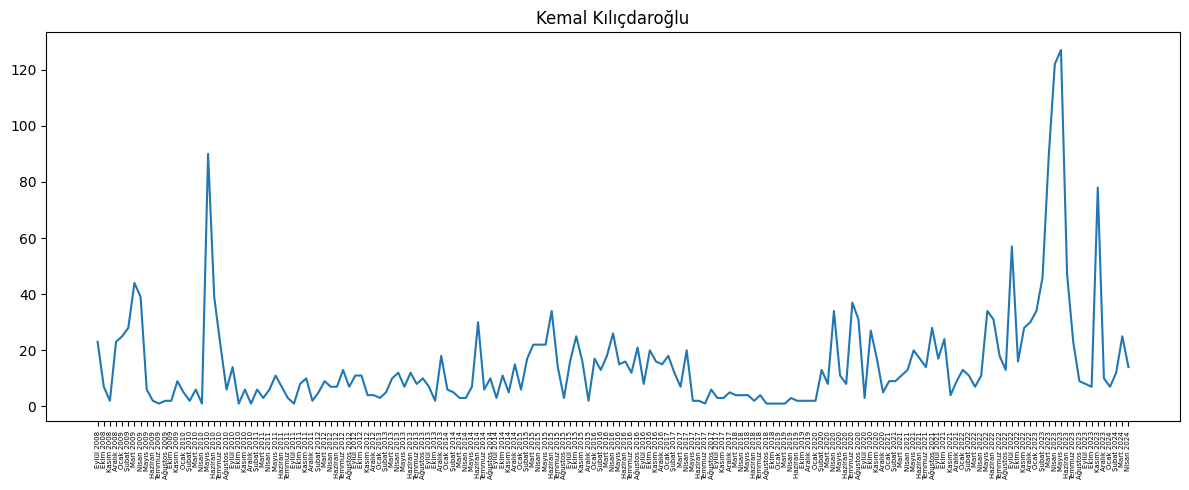

In [61]:
fig = plt.figure(figsize = (12, 5))
plt.plot(kemal["Month"], kemal["Number of Edits"])
plt.title("Kemal Kılıçdaroğlu")
plt.xticks(fontsize=5, rotation='vertical')
plt.tight_layout()
plt.show()

In [86]:
def convert_date(date):
    date= date.split(",")[1].strip()
    #months are in Turkish
    for key in month_dict:
        date = date.replace(key, str(month_dict[key]))
    date = date.split(" ")
    date = date[2]+"-"+date[1]+"-"+date[0]
    date = datetime.strptime(date, "%Y-%m-%d")
    return date


def get_revision_frequency(article, start_date, end_date):
    url = f'https://tr.wikipedia.org/w/index.php?title={article.replace(" ", "_")}&action=history&limit=3000'
    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    
    # Extract and filter timestamps
    timestamps = []
    for item in soup.find_all('a', class_='mw-changeslist-date'):
        timestamp = convert_date(item.text)
        if start_date <= timestamp <= end_date:
            timestamps.append(timestamp.strftime('%Y-%m'))
            
    # Count edits per month
    edits_per_month = Counter(timestamps)

    # Create a DataFrame for all months in the range
    date_range = pd.date_range(start=start_date, end=end_date, freq='MS').strftime('%Y-%m')
    df = pd.DataFrame({'Month': date_range})
    df.set_index('Month', inplace=True)

    # Merge the counts with the date range
    edit_counts = pd.Series(edits_per_month)
    df = df.join(edit_counts.rename('Number of Edits')).fillna(0).reset_index()
    
    return df




In [104]:
# Usage example
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
path = os.path.join("data", "politicians.csv")
politicians = pd.read_csv(path, sep=";")
parties = ["AKP", "CHP", "MHP", "İYİ", "DEM"]

all_df = []
for party in parties:
    pol_list = politicians[politicians["party"] == party]   
    for pol in pol_list["name"]:
        df = []     
        data = get_revision_frequency(pol, start_date, end_date)
        df.append(data)
    all_df.append(df)
    
"""
combined_df = pd.concat(df)
result_df = combined_df.groupby("Month").sum().reset_index()
df.append(data)
"""

https://tr.wikipedia.org/w/index.php?title=Recep_Tayyip_Erdoğan&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Murat_Kurum&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Mehmet_Şimşek&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Süleyman_Soylu&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Berat_Albayrak&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Efkan_Âlâ&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=_Binali_Yıldırım&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Özgür_Özel&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Mansur_Yavaş&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Kemal_Kılıçdaroğlu&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Ekrem_İmamoğlu&action=history&limit=3000
https://tr.wikipedia.org/w/index.php?title=Devlet_Bahçeli&action=history&limit=

'\ncombined_df = pd.concat(df)\nresult_df = combined_df.groupby("Month").sum().reset_index()\ndf.append(data)\n'

In [105]:
all_df

[[      Month  Number of Edits
  0   2022-01                3
  1   2022-02                7
  2   2022-03                9
  3   2022-04                2
  4   2022-05               12
  5   2022-06                4
  6   2022-07                9
  7   2022-08                2
  8   2022-09                2
  9   2022-10               15
  10  2022-11                6
  11  2022-12                4],
 [      Month  Number of Edits
  0   2022-01               18
  1   2022-02               44
  2   2022-03               12
  3   2022-04                9
  4   2022-05               35
  5   2022-06               39
  6   2022-07               27
  7   2022-08               13
  8   2022-09                7
  9   2022-10                6
  10  2022-11                3
  11  2022-12              101],
 [      Month  Number of Edits
  0   2022-01              1.0
  1   2022-02              0.0
  2   2022-03              0.0
  3   2022-04              0.0
  4   2022-05              0.0
  5 

In [67]:
combined_df = pd.concat(df)
result_df = combined_df.groupby("Month").sum().reset_index()
result_df

,Month,Number of Edits
0,2022-01,40.0
1,2022-02,44.0
2,2022-03,41.0
3,2022-04,13.0
4,2022-05,34.0
5,2022-06,19.0
6,2022-07,18.0
7,2022-08,18.0
8,2022-09,28.0
9,2022-10,57.0
